<a href="https://colab.research.google.com/github/Raman-Raje/git-github/blob/master/Data_Visualization_with_Haberman_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Exploratory data analysis (EDA)

In [0]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Haberman Dataset

Toy  Dataset: Haberman's Survival Data.
* Number of Attributes: 4 (including the class attribute)
* Number of Instances: 306
* The dataset contains cases from a study that was conducted between 1958 and 1970


In [0]:
df = pd.read_csv("/content/drive/My Drive/assignment/haberman.csv")
print(df.shape)

(306, 4)


In [0]:
print("Number of attributes = {}".format(df.columns))

Number of attributes = Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [0]:
# Number of intances for each class
df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

# (3.2) Countplot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


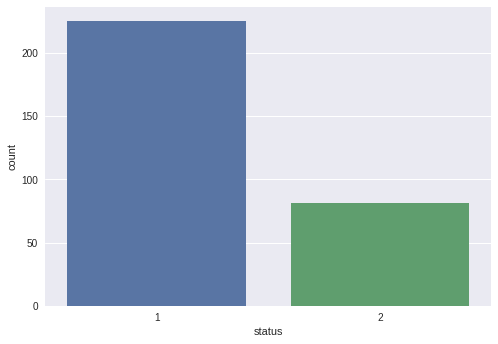

In [0]:
sns.countplot(x="status",data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


<Figure size 360x1080 with 0 Axes>

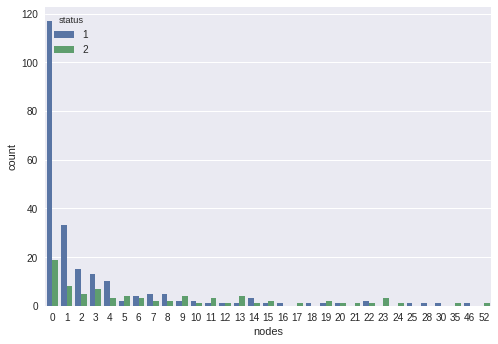

<Figure size 360x1080 with 0 Axes>

In [0]:
sns.countplot(x="nodes",hue="status",data=df)
plt.figure(figsize=(5,15))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


<Figure size 360x1440 with 0 Axes>

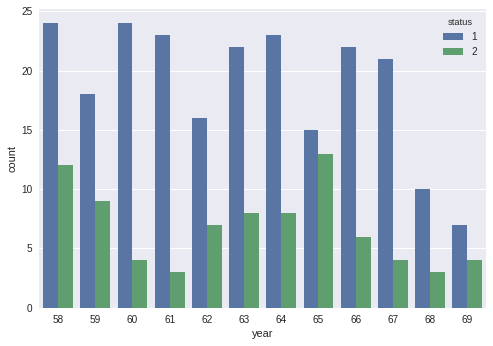

<Figure size 360x1440 with 0 Axes>

In [0]:
sns.countplot(x="year",hue="status",data=df)
plt.figure(figsize=(5,20))

**Observation(s):**
1. Operation year has no relation with surival as well as number of nodes
2. Patiients with less number of nodes have high chance of survival of more than 5 years

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

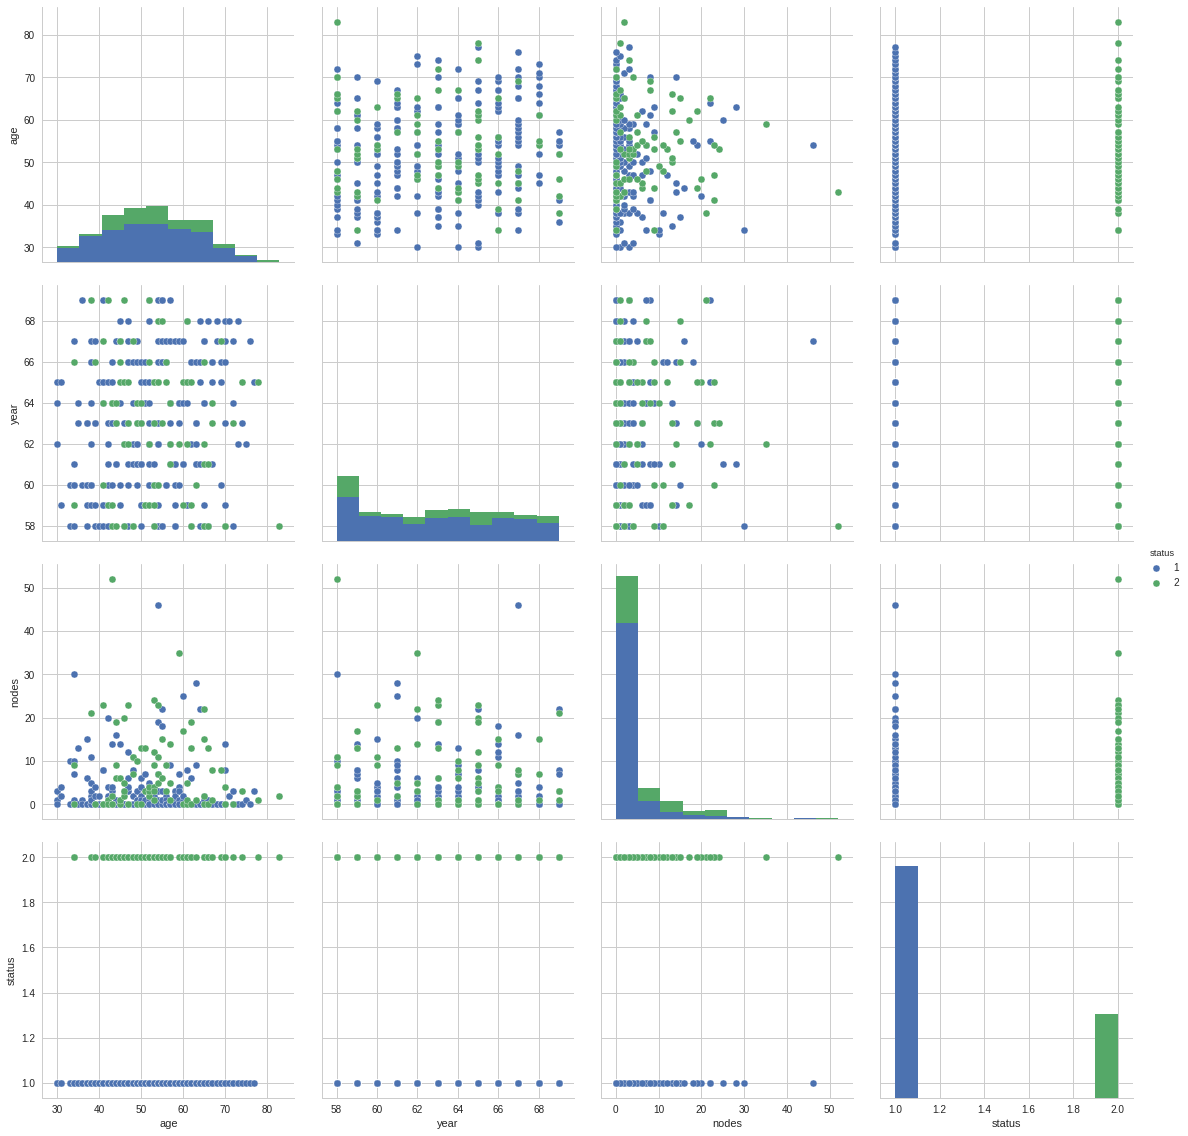

In [0]:
# pairwise scatter plot: Pair-Plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", size=4);
plt.show()

**Observations**
1. age and nodes are the most useful parameters
2. year of operation has no relation with survival

# (3.4) Histogram, PDF/ CDF

##PDF

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


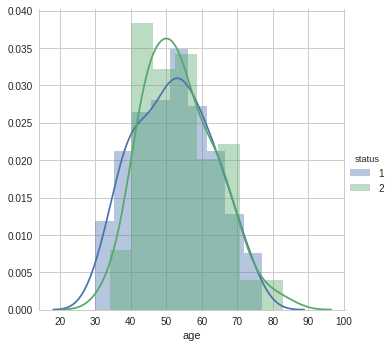

In [0]:
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "age").add_legend()
plt.show()



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


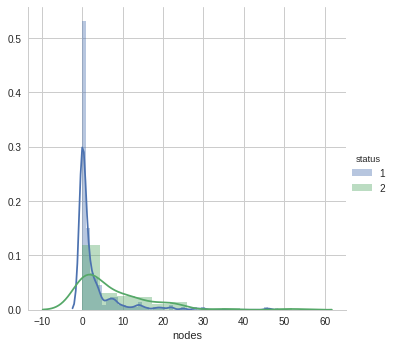

In [0]:
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "nodes").add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


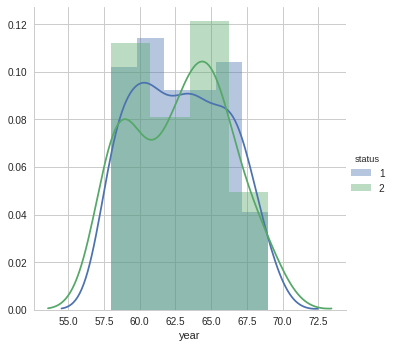

In [0]:
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "year").add_legend()
plt.show()

##CDF

In [0]:
df_1 = df.loc[df["status"] == 1]
df_2 = df.loc[df["status"] == 2]

[0.16       0.21777778 0.32888889 0.20444444 0.08888889]
[30.  39.4 48.8 58.2 67.6 77. ]


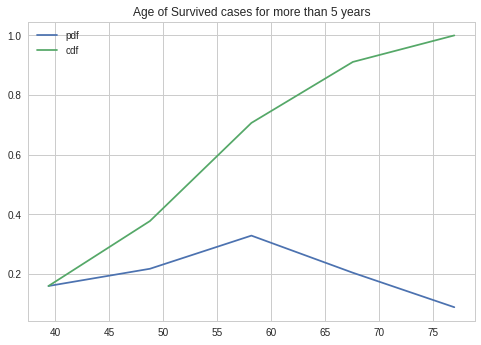

In [0]:
counts, bin_edges = np.histogram(df_1['age'], bins=5, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("Age of Survived cases for more than 5 years")
plt.legend(["pdf","cdf"])

[0.91555556 0.04888889 0.02222222 0.00888889 0.00444444]
[ 0.   9.2 18.4 27.6 36.8 46. ]


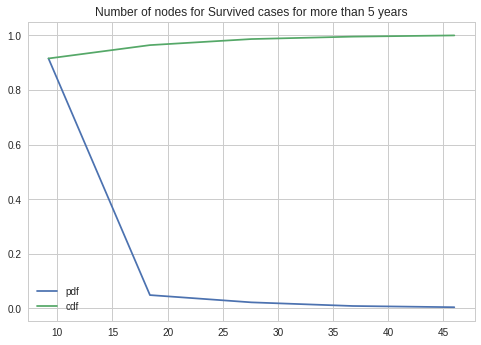

In [0]:
counts, bin_edges = np.histogram(df_1['nodes'], bins=5, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("Number of nodes for Survived cases for more than 5 years")
plt.legend(["pdf","cdf"])

[0.16049383 0.39506173 0.25925926 0.14814815 0.03703704]
[34.  43.8 53.6 63.4 73.2 83. ]


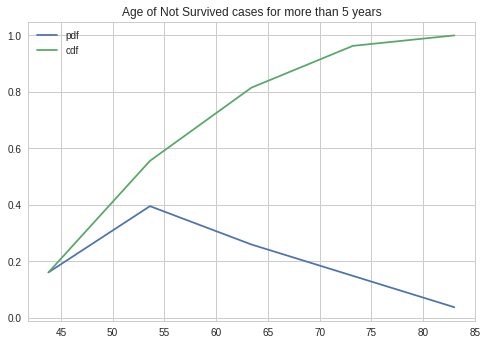

In [0]:
counts, bin_edges = np.histogram(df_2['age'], bins=5, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("Age of Not Survived cases for more than 5 years")
plt.legend(["pdf","cdf"])

[0.71604938 0.18518519 0.07407407 0.01234568 0.01234568]
[ 0.  10.4 20.8 31.2 41.6 52. ]


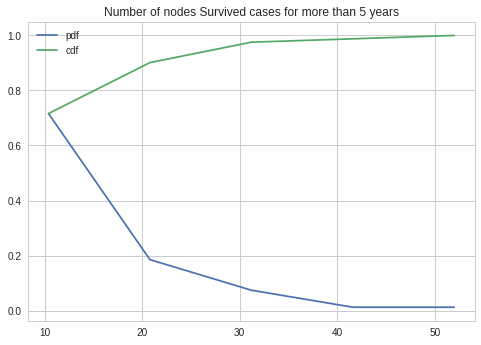

In [0]:
counts, bin_edges = np.histogram(df_2['nodes'], bins=5, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("Number of nodes Survived cases for more than 5 years")
plt.legend(["pdf","cdf"])

# (3.5) Mean, Variance and Std-dev

In [0]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# (3.6) Box plot and Whiskers

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


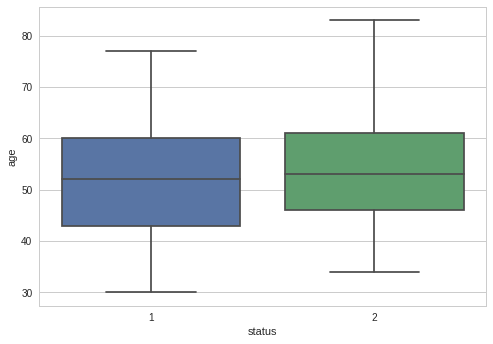

In [0]:
sns.boxplot(x='status',y='age', data=df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


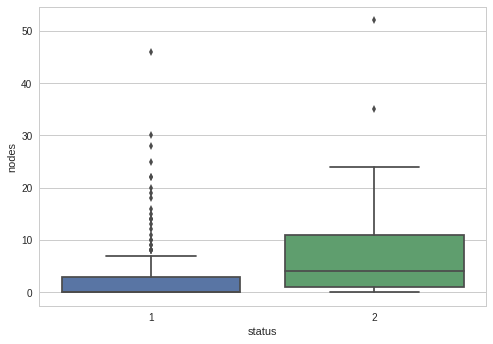

In [0]:
sns.boxplot(x='status',y='nodes', data=df)
plt.show()

1. Survival of patient after operation has very less relationship with age
2. Patients with **less than 5 nodes **have high survival chance of more than 5 years after operation

# (3.7) Violin plots

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


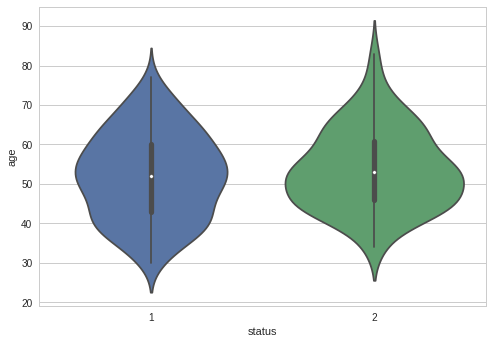

In [0]:
sns.violinplot(x="status", y="age", data=df, size=8)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


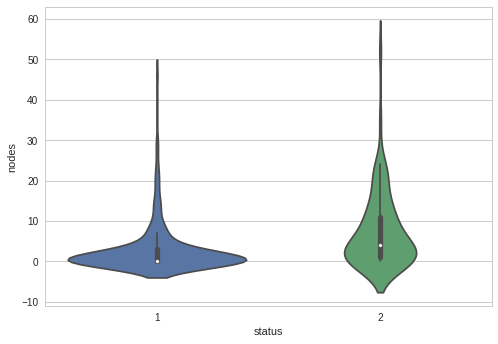

In [0]:
sns.violinplot(x="status", y="nodes", data=df, size=8)
plt.show()

1. Survival of patient after operation has very less relationship with age
2. Patients with **less than 5 nodes **have high survival chance of **more than 5 years after operation**

# (3.8) Multivariate probability density, contour plot.


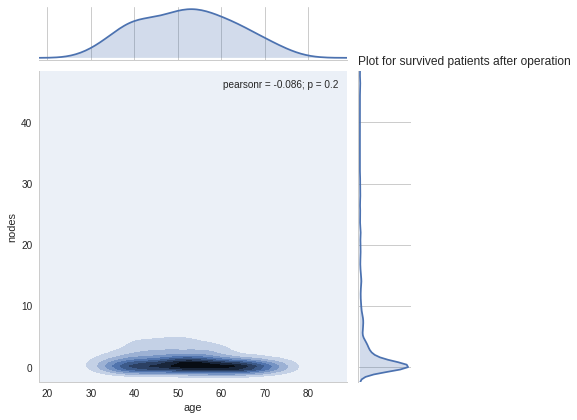

In [0]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=df_1, kind="kde")
plt.title("Plot for survived patients after operation",loc="left")
plt.show()


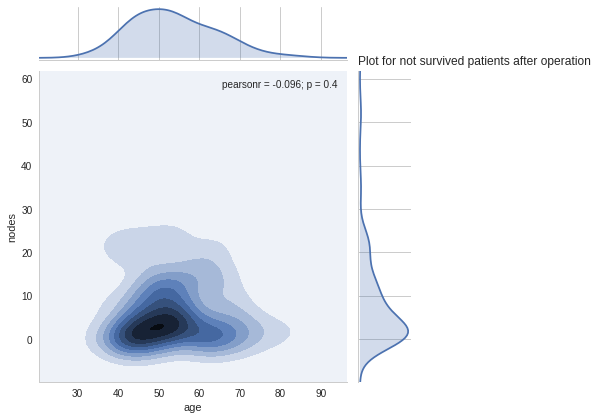

In [0]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=df_2, kind="kde")
plt.title("Plot for not survived patients after operation",loc="left")
plt.show()

**Final Conclusions**


1.   **Number of nodes** is most important attribute
2.   Patients having **less than 5-10 nodes** have mostly survived for **more than 5 years after operation**
3.   Age has very less dependancy on survival
4.   **No Relation found between Operation year and Survival**

